In [1]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import eulerN as arch 
import torch
from torch import nn
import count_params as cp
import itertools

Text(0.5, 1.0, 'L96 - $\\log_{10}(\\text{#params})$')

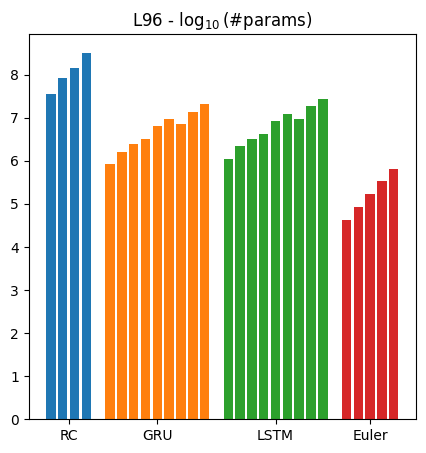

In [43]:
dim = 40
vlachas_L96 = {'RC': [cp.rc(dim, h) for h in [6000, 9000, 12000, 18000]],\
               'GRU': [cp.gru(dim, *hl) for hl in itertools.product([500, 1000, 1500], [1, 2, 3])],\
               'LSTM': [cp.lstm(dim, *hl) for hl in itertools.product([500, 1000, 1500], [1, 2, 3])]}

us_L96 = [cp.rfm(dim, h) for h in [512, 1024, 2048, 4096, 8192]]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.bar(np.arange(4)-5, np.log10(vlachas_L96['RC']), label=[6000, 9000, 12000, 18000])
# ax.bar_label('RC', padding=3)
ax.bar(np.arange(9), np.log10(vlachas_L96['GRU']))
ax.bar(np.arange(9)+10, np.log10(vlachas_L96['LSTM']))
rects = ax.bar(np.arange(5)+20, np.log10(us_L96))
# ax.bar_label()
ax.set_xticks([-3.5, 4, 14, 22], list(vlachas_L96.keys()) + ['Euler'])
ax.set_title(r'L96 - $\log_{10}(\text{#params})$')
# ax.legend(loc='upper left', ncols=3)
# plt.savefig('../data/plots/params.png', bbox_inches="tight", dpi=300)